In [0]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
with open("/content/drive/My Drive/Colab Notebooks/Quickdraw/classes.txt","r") as f:
  classes = f.read().splitlines()
    
print(classes)

['drums', 'sun', 'laptop', 'anvil', 'baseball_bat', 'ladder', 'eyeglasses', 'grapes', 'book', 'dumbbell', 'traffic_light', 'wristwatch', 'wheel', 'shovel', 'bread', 'table', 'tennis_racquet', 'cloud', 'chair', 'headphones', 'face', 'eye', 'airplane', 'snake', 'lollipop', 'power_outlet', 'pants', 'mushroom', 'star', 'sword', 'clock', 'hot_dog', 'syringe', 'stop_sign', 'mountain', 'smiley_face', 'apple', 'bed', 'shorts', 'broom', 'diving_board', 'flower', 'spider', 'cell_phone', 'car', 'camera', 'tree', 'square', 'moon', 'radio', 'hat', 'pizza', 'axe', 'door', 'tent', 'umbrella', 'line', 'cup', 'fan', 'triangle', 'basketball', 'pillow', 'scissors', 't-shirt', 'tooth', 'alarm_clock', 'paper_clip', 'spoon', 'microphone', 'candle', 'pencil', 'envelope', 'saw', 'frying_pan', 'screwdriver', 'helmet', 'bridge', 'light_bulb', 'ceiling_fan', 'key', 'donut', 'bird', 'circle', 'beard', 'coffee_cup', 'butterfly', 'bench', 'rifle', 'cat', 'sock', 'ice_cream', 'moustache', 'suitcase', 'hammer', 'rain

In [0]:
import urllib.request

def download_data():
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  for c in classes:
    cls_url = c.replace("_","%20")
    path = base+cls_url+'.npy'
    print(path)
    urllib.request.urlretrieve(path, '/content/drive/My Drive/Colab Notebooks/Quickdraw/data/'+c+'.npy')

In [0]:
download_data()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/drums.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sun.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/laptop.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball%20bat.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ladder.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eyeglasses.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dumbbell.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/traffic%20light.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/wristwatch.npy
https://storage.googleapis.com/quickdraw_dat

In [0]:
from sklearn.model_selection import train_test_split

def load_data(root, ratio = 0.2, max_images_per_class = 5000):
  all_files = glob.glob(os.path.join(root, '*.npy'))
  
  x = np.empty([0,784])
  y = np.empty([0])
  class_names = classes
  
  for id, file in enumerate(all_files):
    file_data = np.load(file)
    file_data = file_data[0:max_images_per_class, :]
    labels = np.full(file_data.shape[0],id)
    
    x = np.concatenate((x, file_data), axis = 0)
    y = np.append(y, labels)
    
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    
  return X_train, X_test, y_train, y_test, class_names  

In [0]:
root = "/content/drive/My Drive/Colab Notebooks/Quickdraw/data/"
X_train, X_test, y_train, y_test, class_names = load_data(root)
num_classes = len(class_names)
image_size = 28
print(X_train.shape)

(400000, 784)


apple


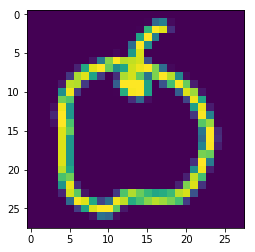

In [0]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  

id = randint(0, len(X_train))
plt.imshow(X_train[id].reshape(28,28)) 
print(class_names[int(y_train[id].item())])

In [0]:
from keras.utils import to_categorical

X_train = X_train.reshape(X_train.shape[0], image_size, image_size, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], image_size, image_size, 1).astype('float32')

X_train /= 255.0
X_test /= 255.0

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [0]:
print(X_train.shape)

(400000, 28, 28, 1)


In [0]:
tf.logging.set_verbosity(tf.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras import optimizers

model = Sequential()
model.add(Conv2D(16,(3, 3),input_shape = X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(100, activation = "softmax"))

adam = optimizers.Adam()
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics=['top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 6, 6, 64)          18496     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 3, 3, 128)       

In [0]:
model.fit(x = X_train, y = y_train, validation_split=0.2, batch_size = 256, verbose=2, epochs=10)

Train on 320000 samples, validate on 80000 samples
Epoch 1/10
 - 12s - loss: 1.8906 - top_k_categorical_accuracy: 0.7843 - val_loss: 1.3523 - val_top_k_categorical_accuracy: 0.8807
Epoch 2/10
 - 10s - loss: 1.1998 - top_k_categorical_accuracy: 0.8981 - val_loss: 1.1207 - val_top_k_categorical_accuracy: 0.9064
Epoch 3/10
 - 10s - loss: 1.0428 - top_k_categorical_accuracy: 0.9152 - val_loss: 1.0429 - val_top_k_categorical_accuracy: 0.9157
Epoch 4/10
 - 10s - loss: 0.9567 - top_k_categorical_accuracy: 0.9238 - val_loss: 0.9741 - val_top_k_categorical_accuracy: 0.9216
Epoch 5/10
 - 10s - loss: 0.8976 - top_k_categorical_accuracy: 0.9298 - val_loss: 0.9424 - val_top_k_categorical_accuracy: 0.9247
Epoch 6/10
 - 10s - loss: 0.8531 - top_k_categorical_accuracy: 0.9337 - val_loss: 0.9053 - val_top_k_categorical_accuracy: 0.9282
Epoch 7/10
 - 10s - loss: 0.8167 - top_k_categorical_accuracy: 0.9374 - val_loss: 0.8946 - val_top_k_categorical_accuracy: 0.9298
Epoch 8/10
 - 10s - loss: 0.7871 - top_

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuarcy: {:0.3f}%'.format(score[1] * 100))

Test accuarcy: 93.243%


In [0]:
model.save("/content/drive/My Drive/Colab Notebooks/Quickdraw/model.h5")

scissors


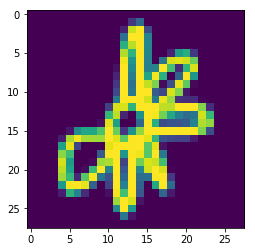

In [0]:
idx = randint(0, len(X_test))
img = X_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex[0])

In [0]:
!tensorflowjs_converter \
    --input_format=keras \
    /content/model.h5 \
    /content/model

Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 6, in <module>
    from tensorflowjs.converters.converter import pip_main
  File "/usr/local/lib/python3.6/dist-packages/tensorflowjs/__init__.py", line 21, in <module>
    from tensorflowjs import converters
  File "/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/__init__.py", line 24, in <module>
    from tensorflowjs.converters.tf_saved_model_conversion_v2 import convert_tf_saved_model
  File "/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/tf_saved_model_conversion_v2.py", line 41, in <module>
    from tensorflowjs.converters import fuse_prelu
  File "/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/fuse_prelu.py", line 200, in <module>
    register_prelu_op()
  File "/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/fuse_prelu.py", line 42, in register_prelu_op
    value.list.type.extend([types_pb2.DataType.DT_FLOAT])
AttributeError: 'Enu

In [0]:
!pip install tensorflowjs

In [0]:
!mkdir model
!tensorflowjs_converter --input_format keras model.h5 model/

In [0]:
!zip -r model.zip model 

In [1]:
print("End")

End
